In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl import mesh

%matplotlib inline

In [2]:
domainSz = np.array([150, 50, 50]) # in mm

In [3]:
cellSz = np.array([10, 10, 10]) # in mm
numCells = (domainSz//cellSz).astype(int) # TODO: ensure domainSz is divisible by cellSz

voxelSz = np.array([1, 1, 1]) # in mm
numVoxels = (cellSz//voxelSz).astype(int)

In [5]:
paramsDim = 1 # number of parameters for each cell
params = 5*np.ones(np.append(numCells, paramsDim))

In [6]:
cells = np.zeros(numCells)
x_c, y_c, z_c = np.meshgrid(range(numCells[0])*cellSz[0], 
                            range(numCells[1])*cellSz[1], 
                            range(numCells[2])*cellSz[2], indexing='ij')

voxels = np.zeros(numVoxels)
x_v, y_v, z_v = np.meshgrid(range(numVoxels[0])*voxelSz[0] + voxelSz[0]/2, 
                            range(numVoxels[1])*voxelSz[1] + voxelSz[1]/2, 
                            range(numVoxels[2])*voxelSz[2] + voxelSz[2]/2, indexing='ij')

In [33]:
field = np.zeros(numCells*numVoxels)
for i in range(numCells[0]):
    for j in range(numCells[1]):
        for k in range(numCells[2]):
            p = params[i, j, k]
            # voxels center coordinates
            x = x_v + x_c[i, j, k]
            y = y_v + y_c[i, j, k]
            z = z_v + z_c[i, j, k]
            # cell center coordinates
            xx = x_c[i, j, k] + cellSz[0]/2
            yy = y_c[i, j, k] + cellSz[1]/2
            zz = z_c[i, j, k] + cellSz[2]/2
            # calculate distance field
            cell = np.sqrt((x - xx)**2 + (y - yy)**2 + (z - zz)**2) - p
            field[i*numVoxels[0]:(i+1)*numVoxels[0], 
                  j*numVoxels[1]:(j+1)*numVoxels[1], 
                  k*numVoxels[2]:(k+1)*numVoxels[2]] += cell

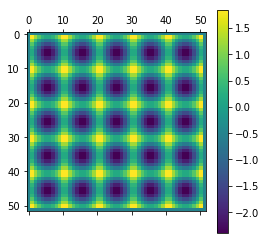

In [34]:
field = np.pad(field, 1, 'constant', constant_values = -0.5)


plt.matshow(field[8, :, :])
plt.colorbar()
plt.show()

In [35]:
verts, faces, normals, values = measure.marching_cubes_lewiner(field, -0.5)

In [36]:
msh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        msh.vectors[i][j] = verts[f[j],:]
msh.save('lattice.stl')